# Plotar a série temporal da chuva

### Plotar a série temporal da chuva anual e máxima mensal de 1 ponto de lat/lon

###  Importar as bibliotecas

In [1]:
import xarray as xr
import numpy as np
import geopandas as gpd
import regionmask as rmk
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
from matplotlib.ticker import MultipleLocator

C:\Users\igf_i\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
path_ERA5 = 'Dados_ERA5/ERA5_Prec_Month_BR_1991-2023.nc'
path_st = 'Serie_Temporal/'
path_shape_BR_regs = 'BR_Regioes/regioes.shp'
path_out = 'Figuras/'

### Utilizar o dataframe já criado no script anterior e importar o csv criado anteriormente também 

In [3]:
df_ERA5 = xr.load_dataset(path_ERA5)

In [4]:
df_ponto = df_ERA5.sel(latitude = -25, longitude = -50, method = 'nearest')

df_ponto = df_ponto * 1000 * df_ponto.time.dt.daysinmonth

In [6]:
prec_ponto = df_ponto['tp']

In [7]:
df_ponto = prec_ponto.to_dataframe().drop(columns = ['longitude', 'latitude'])
df_ponto = df_ponto.rename(columns = {'tp': 'Prec (mm)'})
df_ponto.index.name = 'Data'

In [14]:
# abrir o arquivo csv
df_area_csv = pd.read_csv(f'{path_st}Serie_Temporal_Area.csv', sep = ';', index_col = 'time', parse_dates = ['time'])

In [16]:
df_ponto, df_area_csv

(             Prec (mm)
 Data                  
 1991-01-01  192.434451
 1991-02-01  130.284811
 1991-03-01  184.173187
 1991-04-01   76.457705
 1991-05-01   88.906744
 ...                ...
 2023-08-01   91.988316
 2023-09-01   80.518570
 2023-10-01  323.171931
 2023-11-01  205.452404
 2023-12-01   74.744482
 
 [396 rows x 1 columns],
                     tp
 time                  
 1991-01-01  368.098453
 1991-02-01  198.481664
 1991-03-01  296.070751
 1991-04-01  127.745091
 1991-05-01   36.560859
 ...                ...
 2023-08-01   12.750476
 2023-09-01   11.931643
 2023-10-01   29.085106
 2023-11-01   74.920888
 2023-12-01  138.508710
 
 [396 rows x 1 columns])

<Axes: xlabel='time'>

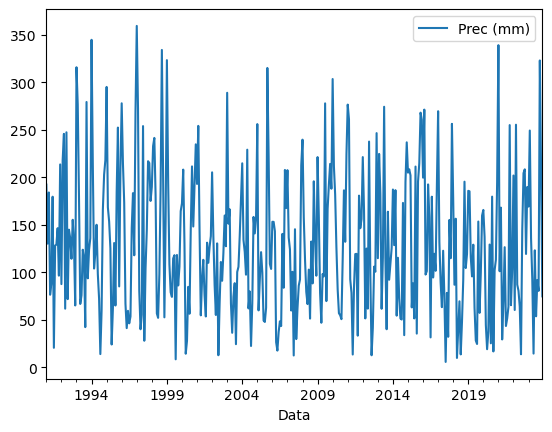

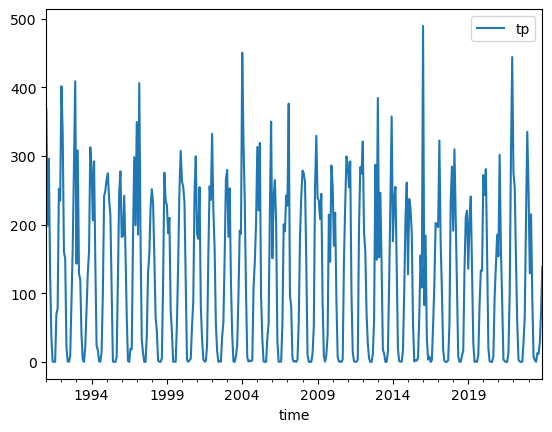

In [18]:
#plota o dataframe do ponto e da área
df_ponto.plot()
df_area_csv.plot() 

### Calcular a chuva anual e máxima mensal

In [21]:
# seleciona o período entre 1991 e 2023 no dataframe
df_ponto = df_ponto['1991' : '2023']

In [22]:
# reamostra a série calculando a soma anual da chuva
df_ponto = df_ponto.resample('Y').sum()

In [24]:
# seleciona o período entre 1991 e 2023 no dataframe
df_area_csv = df_area_csv['1991' : '2023'] 

In [25]:
# Reamostra a série calculando o máximo anual da chuva
df_area_csv = df_area_csv.resample('Y').max() 

In [27]:
df_ponto, df_area_csv

(              Prec (mm)
 Data                   
 1991-12-31  1586.886177
 1992-12-31  1679.517050
 1993-12-31  1829.441844
 1994-12-31  1764.494164
 1995-12-31  1755.996142
 1996-12-31  1651.664567
 1997-12-31  1946.231103
 1998-12-31  1983.288206
 1999-12-31  1498.156886
 2000-12-31  1623.562267
 2001-12-31  1488.905585
 2002-12-31  1306.788499
 2003-12-31  1420.233272
 2004-12-31  1485.570025
 2005-12-31  1542.003431
 2006-12-31  1223.133073
 2007-12-31  1269.959662
 2008-12-31  1460.291716
 2009-12-31  1808.507574
 2010-12-31  1725.438478
 2011-12-31  1562.480860
 2012-12-31  1469.172344
 2013-12-31  1621.494109
 2014-12-31  1485.963755
 2015-12-31  2005.259079
 2016-12-31  1739.044256
 2017-12-31  1393.157096
 2018-12-31  1112.479668
 2019-12-31  1298.184447
 2020-12-31  1166.795355
 2021-12-31  1416.779255
 2022-12-31  1630.595291,
                     tp
 time                  
 1991-12-31  368.098453
 1992-12-31  408.909779
 1993-12-31  312.896241
 1994-12-31  292.233612
 1995

### Plotar ambas as séries temporais na mesma figura

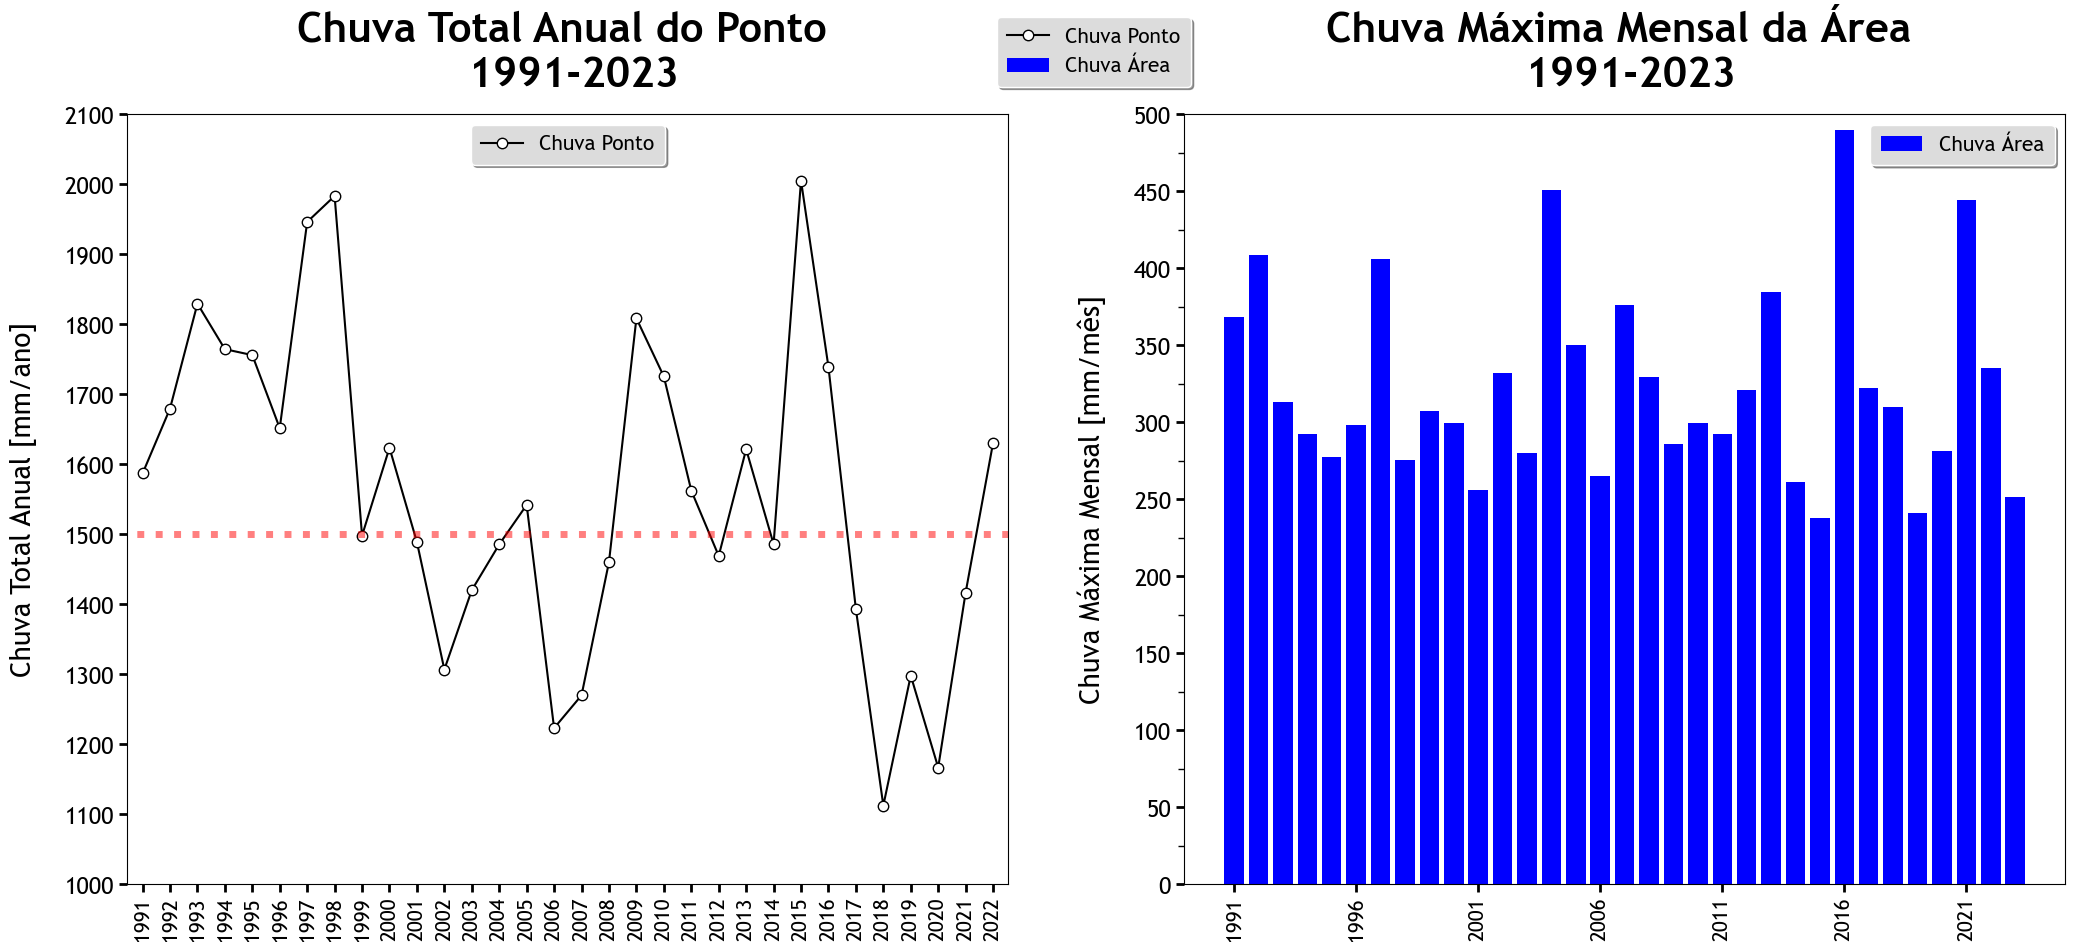

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))

plt.rcParams['font.family'] = 'Trebuchet MS' 

ax1.plot(df_ponto.index.strftime('%Y'), df_ponto['Prec (mm)'], color = 'black',
         marker = '.', markersize = 15, markerfacecolor = 'w', label = 'Chuva Ponto') #plot do dado pontual

ax2.bar(df_area_csv.index.strftime('%Y'), df_area_csv['tp'], color = 'blue', label = 'Chuva Área') #plot do dado da área

ax1.tick_params(which = 'major', direction = 'out', length = 6, width = 2, labelsize = 15) #altera os parâmetros dos ticks dos eixos
ax2.tick_params(which = 'major', direction = 'out', length = 6, width = 2, labelsize = 15)

ax1.tick_params(axis = 'y', labelsize = 17) #aumenta o tamanho da fonte do label do eixo y
ax2.tick_params(axis = 'y', labelsize = 17)

ax1.set_ylabel('Chuva Total Anual [mm/ano]', fontsize = 20, labelpad = 20) #escreve o label do eixo y
ax2.set_ylabel('Chuva Máxima Mensal [mm/mês]', fontsize = 20, labelpad = 20)

ax1.xaxis.set_tick_params(rotation = 90) #rotaciona os labels dos ticks do eixo x
ax2.xaxis.set_tick_params(rotation = 90)

ax1.set_ylim(1000, 2100) #limites do eixo y
ax2.set_ylim(0, 500)

ax1.set_yticks(np.arange(1000, 2200, 100)) #posiciona em quais valores os ticks aparecem nos gráficos
ax2.set_yticks(np.arange(0, 550, 50))

ax2.yaxis.set_minor_locator(MultipleLocator(25)) #intervalo dos minor ticks no eixo y
ax2.tick_params(axis = 'y', which = 'minor', direction = 'out', length = 4, width = 1)

ax1.xaxis.set_major_locator(MultipleLocator(1)) #intervalo dos major ticks no eixo x
ax2.xaxis.set_major_locator(MultipleLocator(5)) 

xinf = ax1.get_xlim()[0] #valor da posição do primeiro tick do eixo x
xsup = ax1.get_xlim()[1] #valor da posição do último tick do eixo x
ax1.set_xlim(xinf + 1, xsup - 1) #altera os limites do eixo x

ax1.hlines(y = 1500, xmax = xsup, xmin = xinf, ls = ':', color = 'red', alpha = 0.5, lw = 5) #adiciona uma linha na horizontal

ax1.set_title('Chuva Total Anual do Ponto \n 1991-2023', size = 30, weight = 'bold', pad = 20) #título da figura
ax2.set_title('Chuva Máxima Mensal da Área \n 1991-2023', size = 30, weight = 'bold', pad = 20)

ax1.legend(fontsize = 15, labelcolor = 'black', loc = 'upper center',
            borderpad = 0.5, labelspacing = 0.5, fancybox = True, shadow = True, frameon = True,
            facecolor = 'gainsboro', edgecolor = 'w') #legenda

ax2.legend(fontsize = 15, labelcolor = 'black', loc = 'best',
            borderpad = 0.5, labelspacing = 0.5, fancybox = True, shadow = True, frameon = True,
            facecolor = 'gainsboro', edgecolor = 'white')

fig.legend(fontsize = 15, labelcolor = 'black', loc = 'upper left', bbox_to_anchor = (0.975, 1.14), bbox_transform = ax1.transAxes,
            borderpad = 0.5, labelspacing = 0.5, fancybox = True, shadow = True, frameon = True,
            facecolor = 'gainsboro', edgecolor = 'white')

plt.savefig(f'{path_out}Series_Temporais_Ponto_Area.jpeg', dpi = 600, bbox_inches = 'tight')